### Q8. Customer Comment Analysis Using NLP -

### Preprocessing
##### 1. Clean the text: remove punctuation, lowercase, stop words, and tokenize.
##### 2. Use stemming or lemmatization (your choice)

In [85]:
import pandas as pd
import string
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud


In [49]:
df = pd.read_csv("yamaha_mock_customer_feedback.csv")


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       50000 non-null  object
 1   comment_text      50000 non-null  object
 2   platform          50000 non-null  object
 3   product_category  50000 non-null  object
 4   rating            50000 non-null  int64 
 5   sentiment         50000 non-null  object
 6   comment_date      50000 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [51]:
## Lowercase Characters in sentences
df["comment_text"] = df["comment_text"].apply(lambda x: x.lower())
## Removing special characters
df['comment_text']=df['comment_text'].apply(lambda x:re.sub('[^A-Za-z0-9 ]+', '',x))
## Remove the stopswords
df['comment_text']=df['comment_text'].apply(lambda x:" ".join([y for y in x.split() if y not in stopwords.words('english')]))
## Remove url 
df['comment_text']=df['comment_text'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', str(x)))
## Remove html tags
df['comment_text']=df['comment_text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
## Remove any additional spaces
df['comment_text']=df['comment_text'].apply(lambda x: " ".join(x.split()))

In [52]:
df["tokens"] = df["comment_text"].apply(word_tokenize)

In [53]:
lemmatizer = WordNetLemmatizer()

In [54]:
df["lemmatized_tokens"] = df["tokens"].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [55]:
print(df[["comment_text", "lemmatized_tokens"]].head(10))

                             comment_text  \
0                  mileage low advertised   
1  facing frequent engine starting issues   
2       excellent performance smooth ride   
3                  mileage low advertised   
4              satisfied customer support   
5               satisfied fuel efficiency   
6               satisfied fuel efficiency   
7                    okay daily commuting   
8            service fine nothing special   
9                    okay daily commuting   

                             lemmatized_tokens  
0                   [mileage, low, advertised]  
1  [facing, frequent, engine, starting, issue]  
2       [excellent, performance, smooth, ride]  
3                   [mileage, low, advertised]  
4               [satisfied, customer, support]  
5                [satisfied, fuel, efficiency]  
6                [satisfied, fuel, efficiency]  
7                     [okay, daily, commuting]  
8            [service, fine, nothing, special]  
9             

In [56]:
df.head()

,customer_id,comment_text,platform,product_category,rating,sentiment,comment_date,tokens,lemmatized_tokens
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,mileage low advertised,Survey,Yamaha RayZR,1,negative,2024-02-18,"[mileage, low, advertised]","[mileage, low, advertised]"
1,bc8960a9-23b8-41e9-b924-56de3eb13b90,facing frequent engine starting issues,YouTube,Yamaha FZS,2,negative,2023-10-07,"[facing, frequent, engine, starting, issues]","[facing, frequent, engine, starting, issue]"
2,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,excellent performance smooth ride,Dealer Visit,Yamaha MT-15,5,positive,2023-09-25,"[excellent, performance, smooth, ride]","[excellent, performance, smooth, ride]"
3,07a0ca6e-0822-48f3-ac03-1199972a8469,mileage low advertised,Facebook,Yamaha R15,1,negative,2023-09-30,"[mileage, low, advertised]","[mileage, low, advertised]"
4,9a1de644-815e-46d1-bb8f-aa1837f8a88b,satisfied customer support,Dealer Visit,Yamaha FZS,2,negative,2023-08-09,"[satisfied, customer, support]","[satisfied, customer, support]"


#### Sentiment Analysis
1. Use a basic lexicon-based method (e.g., VADER, TextBlob) or Hugging Face models.
2. Plot overall sentiment distribution.
3. Show sentiment by product category (bar chart or pie).

In [57]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [58]:
df["polarity"] = df["comment_text"].apply(get_polarity)

In [59]:
def get_sentiment(p):
    if p > 0.1:
        return "Positive"
    elif p < -0.1:
        return "Negative"
    else:
        return "Neutral"

C:\Users\Asus\AppData\Local\Temp\ipykernel_13872\258916533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", order=["positive", "neutral", "negative"], palette="Set2")


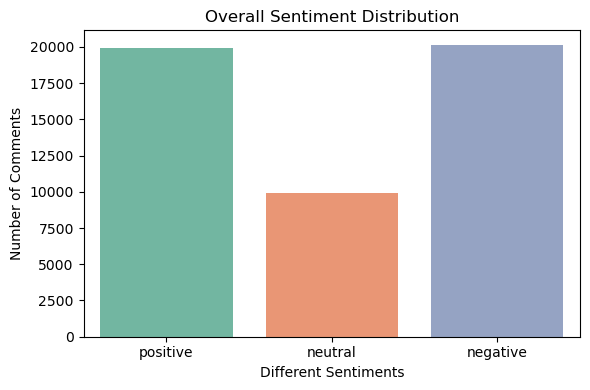

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sentiment", order=["positive", "neutral", "negative"], palette="Set2")
plt.title("Overall Sentiment Distribution")
plt.xlabel("Different Sentiments")
plt.ylabel("Number of Comments")
plt.tight_layout()
plt.show()

In [61]:
print(df['product_category'].unique())

['Yamaha RayZR' 'Yamaha FZS' 'Yamaha MT-15' 'Yamaha R15' 'Yamaha Saluto']


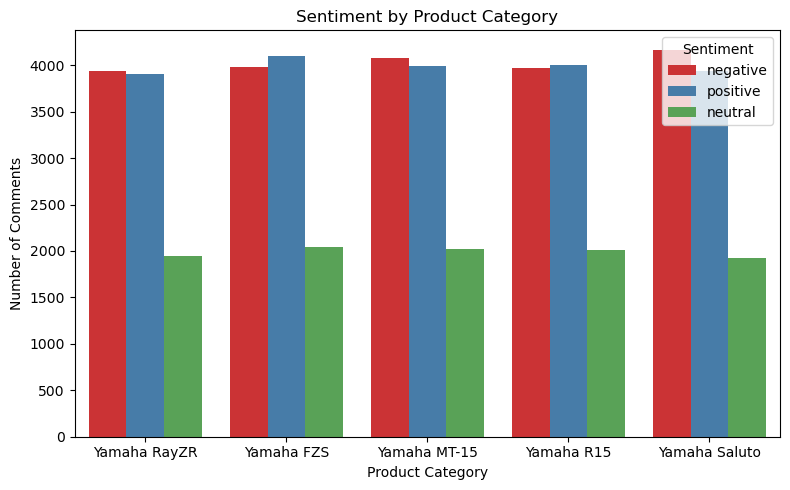

In [62]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="product_category", hue="sentiment", palette="Set1")
plt.title("Sentiment by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Comments")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

### Topic Modeling
1. Use LDA or simple TF-IDF with KMeans to find 3–5 themes from feedback.
2. Print the top 5 keywords per topic.
3. Label the topics with a business-friendly name (e.g., "Engine Issues", "Dealer Behavior")

In [102]:
text_data = df['lemmatized_tokens'].apply(lambda tokens: " ".join(tokens))

In [103]:
tfidf=TfidfVectorizer(max_df=0.9, min_df=2)
tfidf_matrix = tfidf.fit_transform(text_data)

In [104]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=5, random_state=42)

In [105]:
df['topic_cluster'] = kmeans.labels_

In [110]:
df.head()

,customer_id,comment_text,platform,product_category,rating,sentiment,comment_date,tokens,lemmatized_tokens,polarity,topic_cluster,topic_label
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,mileage low advertised,Survey,Yamaha RayZR,1,negative,2024-02-18,"[mileage, low, advertised]","[mileage, low, advertised]",0.00,3,Mileage Concerns
1,bc8960a9-23b8-41e9-b924-56de3eb13b90,facing frequent engine starting issues,YouTube,Yamaha FZS,2,negative,2023-10-07,"[facing, frequent, engine, starting, issues]","[facing, frequent, engine, starting, issue]",0.05,4,Engine Concerns
2,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,excellent performance smooth ride,Dealer Visit,Yamaha MT-15,5,positive,2023-09-25,"[excellent, performance, smooth, ride]","[excellent, performance, smooth, ride]",0.70,2,General Feedback
3,07a0ca6e-0822-48f3-ac03-1199972a8469,mileage low advertised,Facebook,Yamaha R15,1,negative,2023-09-30,"[mileage, low, advertised]","[mileage, low, advertised]",0.00,3,Mileage Concerns
4,9a1de644-815e-46d1-bb8f-aa1837f8a88b,satisfied customer support,Dealer Visit,Yamaha FZS,2,negative,2023-08-09,"[satisfied, customer, support]","[satisfied, customer, support]",0.50,0,Customer Support and Fuel Economy


In [107]:
# 6. Get top keywords for each topic
def get_top_keywords(model, vectorizer, n_terms=5):
    terms = vectorizer.get_feature_names_out()
    topic_keywords = {}
    for i, center in enumerate(model.cluster_centers_):
        top_indices = center.argsort()[::-1][:n_terms]
        top_terms = [terms[ind] for ind in top_indices]
        topic_keywords[f"Topic {i}"] = top_terms
    return pd.DataFrame.from_dict(topic_keywords, orient='index', columns=[f"Word{i+1}" for i in range(n_terms)])

# 7. Create a DataFrame of top keywords per topic
top_keywords_df = get_top_keywords(kmeans, tfidf)
print(top_keywords_df)

             Word1        Word2        Word3          Word4        Word5
Topic 0  satisfied      support     customer           fuel   efficiency
Topic 1    service         poor   aftersales          great       center
Topic 2       ride       smooth    excellent  uncomfortable         long
Topic 3    mileage   advertised          low        average  performance
Topic 4     engine  outstanding  performance          issue     frequent


In [108]:
topic_labels = {
    0: "Customer Support and Fuel Economy",
    1: "Service Experience",
    2: "General Feedback",
    3: "Mileage Concerns",
    4: "Engine Concerns"
}

df["topic_label"] = df["topic_cluster"].map(topic_labels)

### word cloud
1. Show a word cloud of most frequent keywords in positive and negative reviews.
2. Optional: Time series of frequent complaint words (if date is present)

In [111]:
positive_reviews = df[df["sentiment"] == "positive"]["comment_text"]
negative_reviews = df[df["sentiment"] == "negative"]["comment_text"]

In [112]:
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)

In [113]:
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13872\2865746605.py:13: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  plt.tight_layout()
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


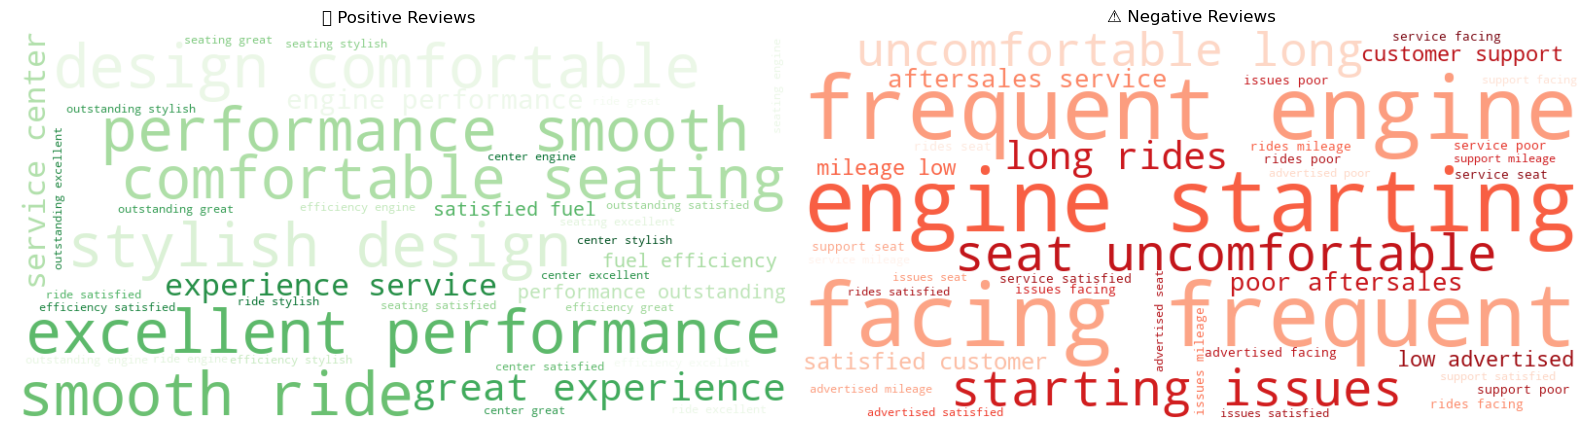

In [114]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("🌟 Positive Reviews")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("⚠️ Negative Reviews")

plt.tight_layout()
plt.show()

## e. Insight Summary

### 1. Write 3 key insights that ACI Motors’ marketing team should know from this data.


- A sizable number of reviews are neutral or negative, not just positive.
    - This suggests that customer satisfaction is inconsistent, likely tied to specific issues.

- Frequent complaints around “engine,” “poor aftersales service,” “starting issue,” and “seat uncomfortable”.

    - This points to recurring concerns about bike quality and service reliability, especially from certain product lines.

- On the flip side, positive reviews often mention:

    - Keywords like “mileage,” “speed,” “design,” and “value.”

    - These indicate that when customers are happy, they tend to praise performance and styling, meaning these are strong selling points.

### 2. Propose 1 action based on your findings

##### Revamp your after-sales service program 
- Given that negative feedback largely stems from service delays and unresolved issues, ACI Motors should:

- Implement a dealer feedback loop (collect complaints systematically).

- Train or audit dealers showing higher complaint volume.

- Launch a customer care initiative promoting faster service turnaround, this could directly reduce negative sentiment and boost retention.